In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import integrate

This notebook aims to analyze the potential impact of transonic speeds on the barometric altimeters flown on AirBears on 2020-02-15.

In [2]:
# pip install xlrd
file = pd.ExcelFile('airbears_20200215.xlsx')
data = pd.read_excel(file, 'Data', header=[11,12])
data.keys()

MultiIndex(levels=[['Altitude', 'Press', 'Time', 'TotalAcc', 'Unnamed: 0_level_0', 'Xacc', 'Yacc', 'Zacc'], ['Gs', 'Pa', 'Unnamed: 0_level_1', 'Unnamed: 1_level_1', 'feet']],
           codes=[[4, 2, 1, 0, 5, 6, 7, 3], [2, 3, 1, 4, 0, 0, 0, 0]])

Text(0, 0.5, 'Altitude (ft)')

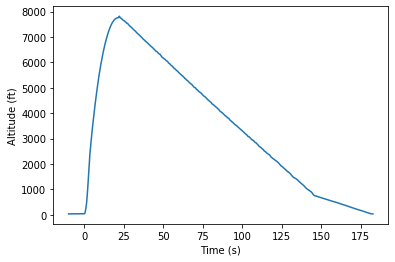

In [3]:
# first, let's plot altitude
times = np.array(data["Time"]).flatten()
alts  = np.array(data["Altitude"]).flatten()
plt.plot(times[times > -10], alts[times > -10])
plt.xlabel("Time (s)")
plt.ylabel("Altitude (ft)")

Yay, that looks about expected - little changes in the slope for drogue and main deployment.

Text(0, 0.5, 'Z-acceleration (Gs)')

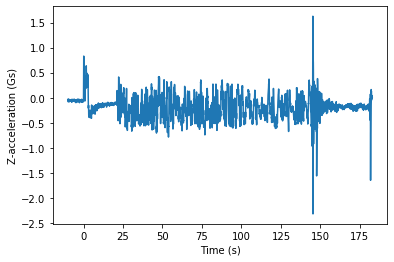

In [4]:
# next, we double-integrate z acceleration. First, let's plot it
z_accs = np.array(data["Zacc"]).flatten()
plt.plot(times[times > -10], z_accs[times > -10])
plt.xlabel("Time (s)")
plt.ylabel("Z-acceleration (Gs)")

oof that's noisy. But maybe integrating will help!

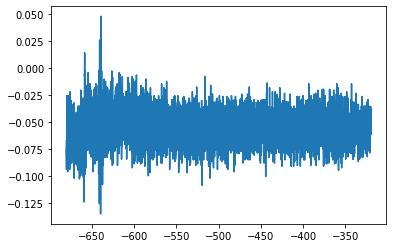

In [14]:
# taking off the zero error: plot of a white-noise period
plt.plot(times[np.abs(times + 500) < 180], z_accs[np.abs(times + 500) < 180])

In [30]:
rms_zero_error = np.sqrt(np.mean(z_accs[np.abs(times + 500) < 200] ** 2))
rms_zero_error

0.05775502088998636

Text(0, 0.5, 'Z position (ft)')

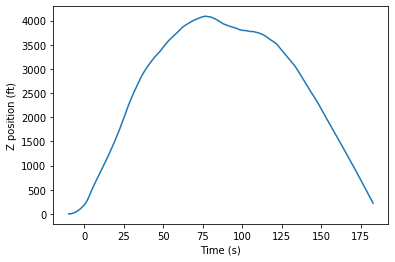

In [38]:
z_vels = integrate.cumtrapz((z_accs + 3.05*rms_zero_error) * (times >= -10) * 32.17, times) # convert Gs to ft/s^2
# 3.05 is ad hoc, to zero it out - unclear why it'd just be blowing up otherwise
z_pos  = integrate.cumtrapz(z_vels, times[1:])
plt.plot(times[2:][times[2:] > -10], z_pos[times[2:] > -10])
plt.xlabel("Time (s)")
plt.ylabel("Z position (ft)")